In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno.missingno as msno
from datetime import datetime
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

from datetime import date
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [ ]:
df = pd.read_csv('marketing_campaign.csv')

df.head().style.background_gradient(cmap='Purples')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe().style.background_gradient(cmap='Purples')

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.000000,11.000000,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.000000,0.000000,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000


# Data Cleaning

## Find Missing Values

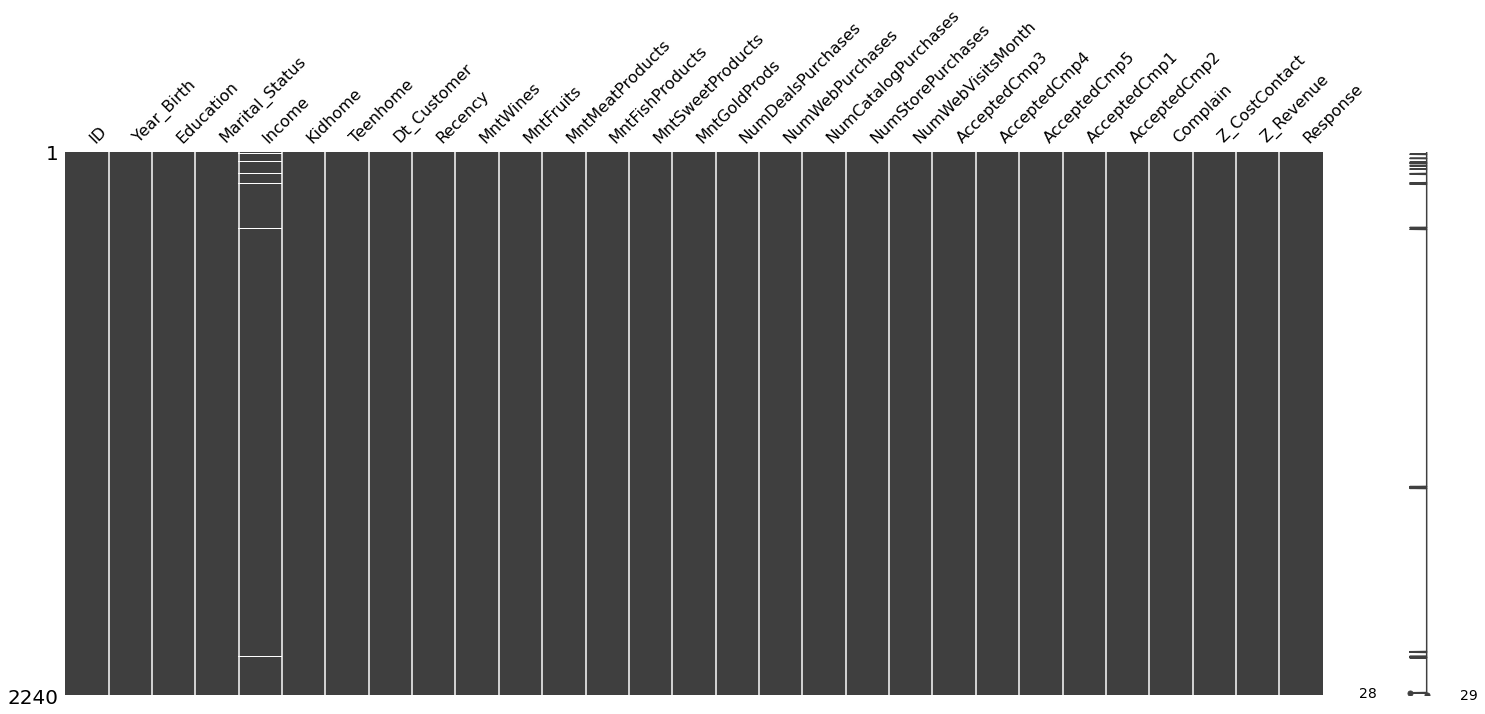

In [ ]:
msno.matrix(df)
plt.show()

In [ ]:
missing_rows = df.Income.isna().sum()
total_rows = df.shape[0]

print(missing_rows)

24


In [ ]:

df[df.isna().any(axis=1)].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0


In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Duplicates
Check Duplicate

In [ ]:
df.shape

(2216, 29)

In [ ]:
# Get all the columns *except* ID
remove_id = df.drop('ID', axis=1).columns

# Check for duplicates
n_duplicates = df.duplicated(subset=remove_id).sum()
print(f'There are {n_duplicates} duplicates in the dataset.')

There are 182 duplicates in the dataset.


In [ ]:
# Remove the duplicates
df.drop_duplicates(subset=remove_id, inplace=True)

In [ ]:
df.shape

(2034, 29)

In [ ]:
df.duplicated().any()

False

## Rename Columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2034 non-null   int64  
 1   Year_Birth           2034 non-null   int64  
 2   Education            2034 non-null   object 
 3   Marital_Status       2034 non-null   object 
 4   Income               2034 non-null   float64
 5   Kidhome              2034 non-null   int64  
 6   Teenhome             2034 non-null   int64  
 7   Dt_Customer          2034 non-null   object 
 8   Recency              2034 non-null   int64  
 9   MntWines             2034 non-null   int64  
 10  MntFruits            2034 non-null   int64  
 11  MntMeatProducts      2034 non-null   int64  
 12  MntFishProducts      2034 non-null   int64  
 13  MntSweetProducts     2034 non-null   int64  
 14  MntGoldProds         2034 non-null   int64  
 15  NumDealsPurchases    2034 non-null   i

In [ ]:
df = df.rename(columns={
    'MntWines'           :'Wines',
    'MntFruits'          :'Fruits',
    'MntMeatProducts'    :'Meat',
    'MntFishProducts'    :'Fish',
    'MntSweetProducts'   :'Sweets',
    'MntGoldProds'       :'Gold',
    'NumDealsPurchases'  :'Dealsp',
    'NumWebPurchases'    :'Webp',
    'NumStorePurchases'  :'Storep',
    'NumWebVisitsMonth'  :'WebVisit',
    'NumCatalogPurchases':'Catalogp',
    'Marital_Status'     :'Mariage'
})

## Remove Columns


In [ ]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [ ]:
df.shape

(2034, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2034 non-null   int64  
 1   Year_Birth    2034 non-null   int64  
 2   Education     2034 non-null   object 
 3   Mariage       2034 non-null   object 
 4   Income        2034 non-null   float64
 5   Kidhome       2034 non-null   int64  
 6   Teenhome      2034 non-null   int64  
 7   Dt_Customer   2034 non-null   object 
 8   Recency       2034 non-null   int64  
 9   Wines         2034 non-null   int64  
 10  Fruits        2034 non-null   int64  
 11  Meat          2034 non-null   int64  
 12  Fish          2034 non-null   int64  
 13  Sweets        2034 non-null   int64  
 14  Gold          2034 non-null   int64  
 15  Dealsp        2034 non-null   int64  
 16  Webp          2034 non-null   int64  
 17  Catalogp      2034 non-null   int64  
 18  Storep        2034 non-null 

# Anlysis, Create New Column

## year_birth

In [ ]:
print("Unique categories present in the Year_Birth:",df["Year_Birth"].value_counts())

Unique categories present in the Year_Birth: 1976    81
1971    78
1975    77
1972    72
1970    71
1978    70
1973    66
1965    66
1969    64
1974    63
1956    52
1977    51
1958    50
1952    49
1968    47
1979    47
1959    46
1960    45
1966    44
1954    44
1955    43
1967    41
1962    40
1957    39
1963    39
1951    39
1980    39
1982    38
1986    38
1984    38
1964    37
1981    37
1983    35
1953    33
1961    32
1985    29
1949    28
1950    26
1987    26
1988    25
1989    24
1948    19
1990    16
1947    15
1991    14
1992    12
1946    11
1945     8
1944     7
1943     5
1995     4
1993     4
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64


## Marital Status


In [ ]:
df['Mariage'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
df.Mariage.value_counts()

Married     788
Together    514
Single      439
Divorced    216
Widow        70
Alone         3
Absurd        2
YOLO          2
Name: Mariage, dtype: int64

In [ ]:
df = df[(df.Mariage != 'YOLO') & (df.Mariage != 'Absurd')]

In [ ]:
df['Mariage'] = df['Mariage'].replace(['Married', 'Together'],'Relationship')
df['Mariage'] = df['Mariage'].replace(['Divorced', 'Widow', 'Alone'],'Single')

Unique categories present in the Mariage: Relationship    1302
Single           728
Name: Mariage, dtype: int64




<Figure size 576x576 with 0 Axes>

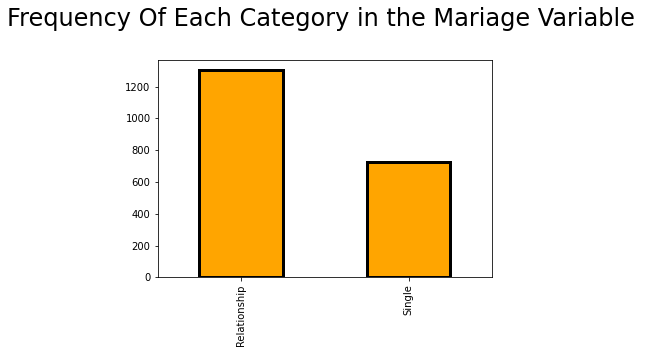

<Figure size 576x576 with 0 Axes>

In [ ]:
print("Unique categories present in the Mariage:",df['Mariage'].value_counts())
print("\n")

df['Mariage'].value_counts().plot(kind='bar',color = 'orange',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Mariage Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

## Education

In [ ]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
df.Education.value_counts()

Graduation    1018
PhD            443
Master         335
2n Cycle       185
Basic           49
Name: Education, dtype: int64

In [ ]:
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')

Unique categories present in the Education: Post Graduate     1981
Under Graduate      49
Name: Education, dtype: int64




<Figure size 576x576 with 0 Axes>

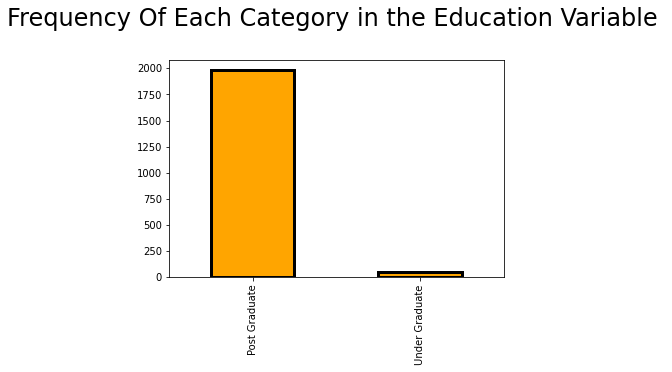

<Figure size 576x576 with 0 Axes>

In [ ]:
print("Unique categories present in the Education:",df["Education"].value_counts())
print('\n')

df['Education'].value_counts().plot(kind='bar',color = 'orange',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Education Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

## Children

In [ ]:
df['Kidhome'].unique()

array([0, 1, 2])

In [ ]:
df['Teenhome'].unique()

array([0, 1, 2])

In [ ]:
df['Children'] = df['Kidhome'] + df['Teenhome']

Unique categories present in the Children: 1    1032
0     570
2     383
3      45
Name: Children, dtype: int64




<Figure size 576x576 with 0 Axes>

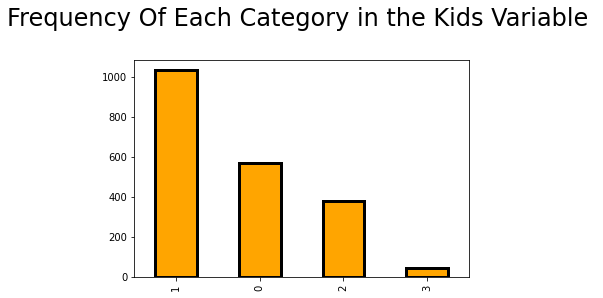

<Figure size 576x576 with 0 Axes>

In [ ]:
print("Unique categories present in the Children:",df['Children'].value_counts())
print("\n")

df['Children'].value_counts().plot(kind='bar',color = 'orange',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Kids Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

## Income

In [ ]:
df['Income'].max()

666666.0

In [ ]:
df['Income'].min()

1730.0

In [ ]:
df['Income'].mean()

52341.9472906404

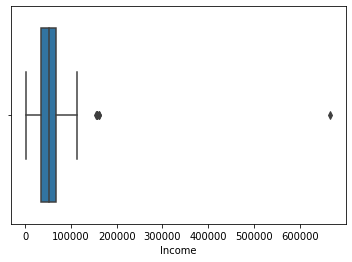

In [ ]:
# Box plot of Income to spot any outliers
sns.boxplot(x="Income", data=df)
plt.show()

In [ ]:
df['Income'] = df.Income.astype(int)  # Convert to integer datatype

In [ ]:
q1 = df['Income'].quantile(.25)
q3 = df['Income'].quantile(.75)
iqr = q3-q1

df['Income'] = df['Income'].mask(((df['Income'] > (q3+(1.5*iqr)))), (q3+(1.5*iqr)))

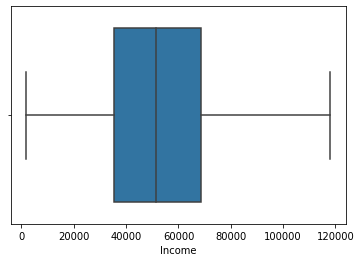

In [ ]:
sns.boxplot(x="Income", data=df)
plt.show()

## MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2030 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2030 non-null   int64  
 1   Year_Birth    2030 non-null   int64  
 2   Education     2030 non-null   object 
 3   Mariage       2030 non-null   object 
 4   Income        2030 non-null   float64
 5   Kidhome       2030 non-null   int64  
 6   Teenhome      2030 non-null   int64  
 7   Dt_Customer   2030 non-null   object 
 8   Recency       2030 non-null   int64  
 9   Wines         2030 non-null   int64  
 10  Fruits        2030 non-null   int64  
 11  Meat          2030 non-null   int64  
 12  Fish          2030 non-null   int64  
 13  Sweets        2030 non-null   int64  
 14  Gold          2030 non-null   int64  
 15  Dealsp        2030 non-null   int64  
 16  Webp          2030 non-null   int64  
 17  Catalogp      2030 non-null   int64  
 18  Storep        2030 non-null 

In [ ]:
df['Expenses'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']
df['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

In [ ]:
#Minimum Expenses
df['Expenses'].min()

5

In [ ]:
#Maximum Expenses
df['Expenses'].max()

2525

In [ ]:
#Average Expenses
df['Expenses'].mean()

607.2418719211822

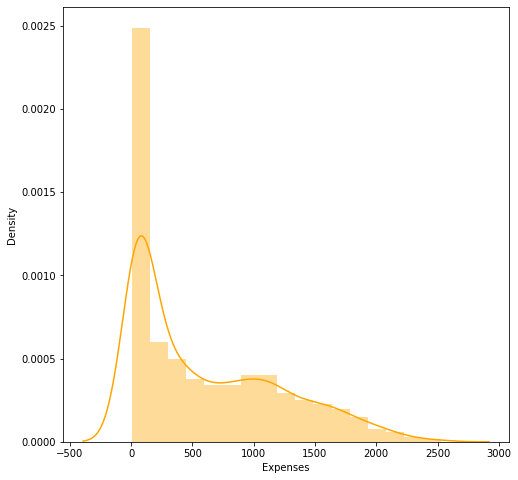

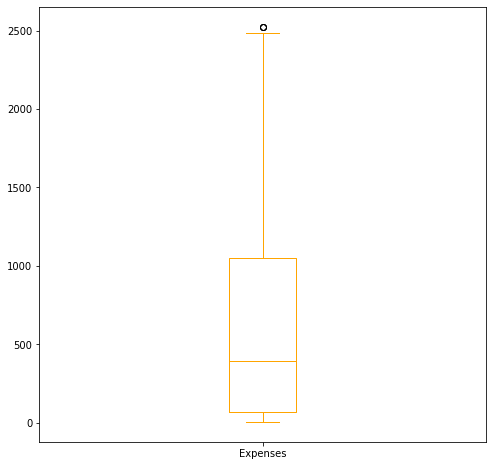

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df["Expenses"],color = 'orange')
plt.show()
df["Expenses"].plot.box(figsize=(8,8),color='orange')
plt.show()

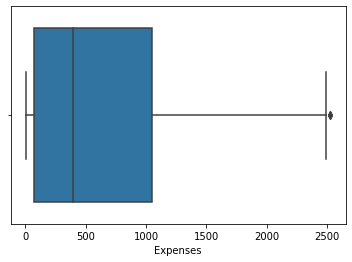

In [ ]:
sns.boxplot(x="Expenses", data=df)
plt.show()

In [ ]:
q1 = df['Expenses'].quantile(.25)
q3 = df['Expenses'].quantile(.75)
iqr = q3-q1

df['Expenses'] = df['Expenses'].mask(((df['Expenses'] > (q3+(1.5*iqr)))), (q3+(1.5*iqr)))

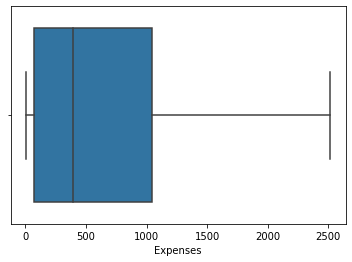

In [ ]:
sns.boxplot(x="Expenses", data=df)
plt.show()

## AcceptedCamp

In [ ]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

Unique categories present in the TotalAcceptedCmp: 0    1604
1     302
2      74
3      40
4      10
Name: TotalAcceptedCmp, dtype: int64




<Figure size 576x576 with 0 Axes>

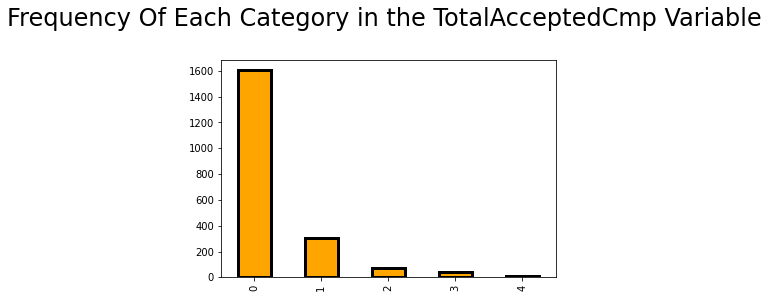

<Figure size 576x576 with 0 Axes>

In [ ]:
print("Unique categories present in the TotalAcceptedCmp:",df['TotalAcceptedCmp'].value_counts())
print("\n")

df['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'orange',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

## Response

In [ ]:
df['Response'].unique

<bound method Series.unique of 0       1
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       1
9       0
11      0
12      0
13      0
14      0
15      1
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
28      0
29      0
30      0
31      0
32      0
33      1
34      0
35      0
36      0
37      0
38      0
39      1
40      0
41      0
42      0
44      0
45      0
46      1
47      0
49      0
50      0
51      0
52      0
53      1
54      0
55      1
56      1
57      0
59      0
60      1
61      0
62      0
63      0
64      0
65      1
66      0
67      1
68      0
69      0
70      0
72      0
73      0
74      0
75      0
76      1
77      1
78      0
79      1
80      0
81      0
82      0
84      0
85      0
86      0
87      1
88      0
89      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0
100     0
101     0
102     0
103     0
104     1
105     0
106     0

## NumTotalPucrchase

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2030 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2030 non-null   int64  
 1   Year_Birth        2030 non-null   int64  
 2   Education         2030 non-null   object 
 3   Mariage           2030 non-null   object 
 4   Income            2030 non-null   float64
 5   Kidhome           2030 non-null   int64  
 6   Teenhome          2030 non-null   int64  
 7   Dt_Customer       2030 non-null   object 
 8   Recency           2030 non-null   int64  
 9   Wines             2030 non-null   int64  
 10  Fruits            2030 non-null   int64  
 11  Meat              2030 non-null   int64  
 12  Fish              2030 non-null   int64  
 13  Sweets            2030 non-null   int64  
 14  Gold              2030 non-null   int64  
 15  Dealsp            2030 non-null   int64  
 16  Webp              2030 non-null   int64  


In [ ]:
df['TotalPurchases'] = df['Webp'] + df['Catalogp'] + df['Storep'] + df['Dealsp']
df['TotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2, 16, 15,  5, 26,  9, 13, 12, 43, 17,
       20, 14, 11, 18, 28,  7, 24,  4, 29, 23, 27, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44])

In [ ]:
df['TotalPurchases'].mean()

14.88128078817734

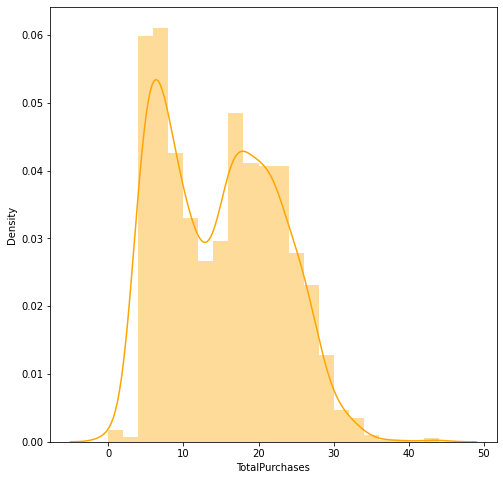

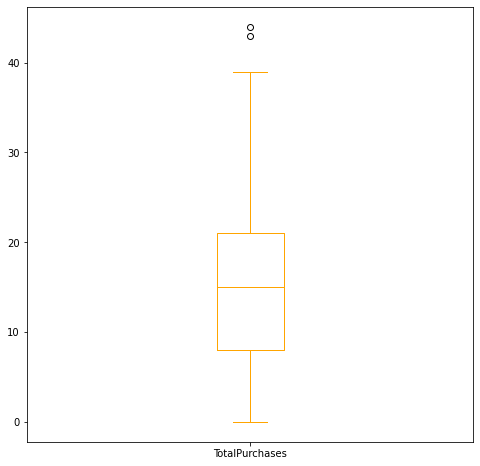

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df["TotalPurchases"],color = 'orange')
plt.show()
df["TotalPurchases"].plot.box(figsize=(8,8),color = 'orange')
plt.show()

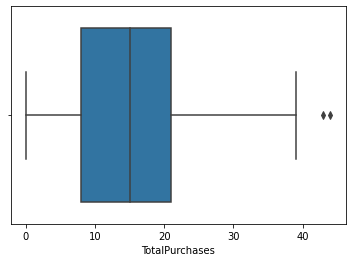

In [ ]:
sns.boxplot(x="TotalPurchases", data=df)
plt.show()

In [ ]:
q1 = df['TotalPurchases'].quantile(.25)
q3 = df['TotalPurchases'].quantile(.75)
iqr = q3-q1

df['TotalPurchases'] = df['TotalPurchases'].mask(((df['TotalPurchases'] > (q3+(1.5*iqr)))), (q3+(1.5*iqr)))

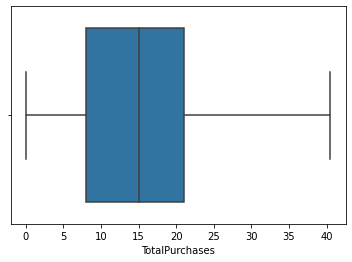

In [ ]:
sns.boxplot(x="TotalPurchases", data=df)
plt.show()

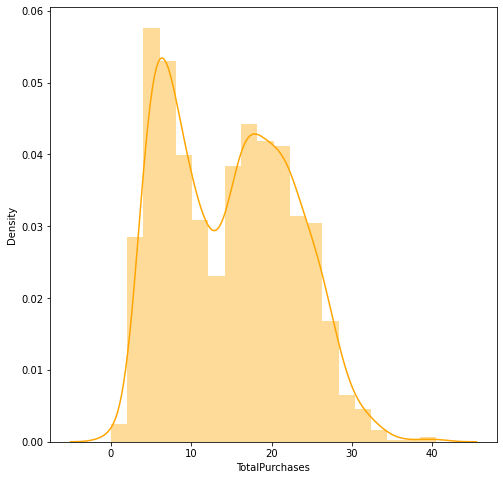

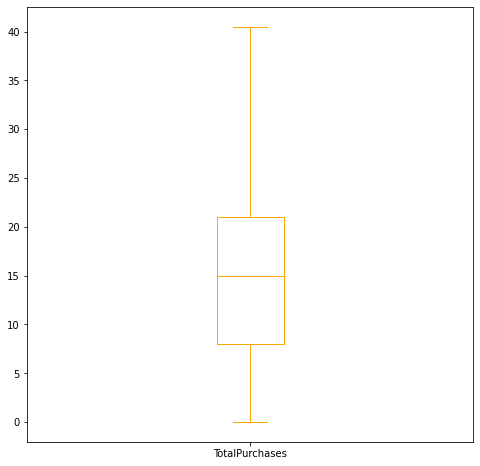

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df["TotalPurchases"],color = 'orange')
plt.show()
df["TotalPurchases"].plot.box(figsize=(8,8),color = 'orange')
plt.show()

## drop column 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2030 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2030 non-null   int64  
 1   Year_Birth        2030 non-null   int64  
 2   Education         2030 non-null   object 
 3   Mariage           2030 non-null   object 
 4   Income            2030 non-null   float64
 5   Kidhome           2030 non-null   int64  
 6   Teenhome          2030 non-null   int64  
 7   Dt_Customer       2030 non-null   object 
 8   Recency           2030 non-null   int64  
 9   Wines             2030 non-null   int64  
 10  Fruits            2030 non-null   int64  
 11  Meat              2030 non-null   int64  
 12  Fish              2030 non-null   int64  
 13  Sweets            2030 non-null   int64  
 14  Gold              2030 non-null   int64  
 15  Dealsp            2030 non-null   int64  
 16  Webp              2030 non-null   int64  


In [ ]:
col_del = ["ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","WebVisit", "Webp","Catalogp","Storep","Dealsp" , "Kidhome", "Teenhome","Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold"]
df=df.drop(columns=col_del,axis=1)


In [ ]:
df.head().style.background_gradient(cmap='Purples')

,Year_Birth,Education,Mariage,Income,Dt_Customer,Recency,Complain,Response,Children,Expenses,TotalAcceptedCmp,TotalPurchases
0,1957,Post Graduate,Single,58138.000000,04-09-2012,58,0,1,0,1617.000000,0,25.000000
1,1954,Post Graduate,Single,46344.000000,08-03-2014,38,0,0,2,27.000000,0,6.000000
2,1965,Post Graduate,Relationship,71613.000000,21-08-2013,26,0,0,0,776.000000,0,21.000000
3,1984,Post Graduate,Relationship,26646.000000,10-02-2014,26,0,0,1,53.000000,0,8.000000
4,1981,Post Graduate,Relationship,58293.000000,19-01-2014,94,0,0,1,422.000000,0,19.000000


## Dtstamp

In [ ]:
# Membuat hari event pernikahan

df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['First_day'] = '01-01-2015'
df['First_day'] = pd.to_datetime(df.First_day)
df['Day_engaged'] = (df['First_day'] - df['Dt_Customer']).dt.days

## Age Member by Year

Unique categories present in the Age: 10    1073
9      512
11     445
Name: Age, dtype: int64




<Figure size 576x576 with 0 Axes>

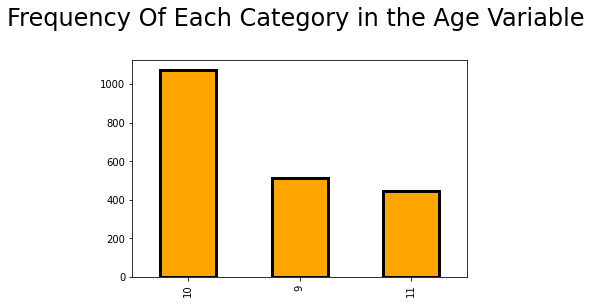

<Figure size 576x576 with 0 Axes>

In [ ]:
# membuat sudah berapa tahun costumer menjadi pelanggan
df['Age'] = (pd.Timestamp('now').year) - (pd.to_datetime(df['Dt_Customer']).dt.year)

print("Unique categories present in the Age:",df['Age'].value_counts())
print("\n")

df['Age'].value_counts().plot(kind='bar',color = 'orange',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Age Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

## drop column

In [ ]:
df.head(5).style.background_gradient(cmap='Purples')

,Year_Birth,Education,Mariage,Income,Dt_Customer,Recency,Complain,Response,Children,Expenses,TotalAcceptedCmp,TotalPurchases,First_day,Day_engaged,Age
0,1957,Post Graduate,Single,58138.000000,2012-04-09 00:00:00,58,0,1,0,1617.000000,0,25.000000,2015-01-01 00:00:00,997,11
1,1954,Post Graduate,Single,46344.000000,2014-08-03 00:00:00,38,0,0,2,27.000000,0,6.000000,2015-01-01 00:00:00,151,9
2,1965,Post Graduate,Relationship,71613.000000,2013-08-21 00:00:00,26,0,0,0,776.000000,0,21.000000,2015-01-01 00:00:00,498,10
3,1984,Post Graduate,Relationship,26646.000000,2014-10-02 00:00:00,26,0,0,1,53.000000,0,8.000000,2015-01-01 00:00:00,91,9
4,1981,Post Graduate,Relationship,58293.000000,2014-01-19 00:00:00,94,0,0,1,422.000000,0,19.000000,2015-01-01 00:00:00,347,9


In [ ]:
df=df.drop(columns=["Dt_Customer", "First_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.head(5).style.background_gradient(cmap='Purples')

,Education,Mariage,Income,Response,Children,Expenses,TotalAcceptedCmp,TotalPurchases,Day_engaged,Age
0,Post Graduate,Single,58138.000000,1,0,1617.000000,0,25.000000,997,11
1,Post Graduate,Single,46344.000000,0,2,27.000000,0,6.000000,151,9
2,Post Graduate,Relationship,71613.000000,0,0,776.000000,0,21.000000,498,10
3,Post Graduate,Relationship,26646.000000,0,1,53.000000,0,8.000000,91,9
4,Post Graduate,Relationship,58293.000000,0,1,422.000000,0,19.000000,347,9


In [ ]:
order = [0,1,9,5,6,7,8,2,4,3]
df = df[[df.columns[i] for i in order]]
df.head(5).style.background_gradient(cmap='Purples')

,Education,Mariage,Age,Expenses,TotalAcceptedCmp,TotalPurchases,Day_engaged,Income,Children,Response
0,Post Graduate,Single,11,1617.000000,0,25.000000,997,58138.000000,0,1
1,Post Graduate,Single,9,27.000000,0,6.000000,151,46344.000000,2,0
2,Post Graduate,Relationship,10,776.000000,0,21.000000,498,71613.000000,0,0
3,Post Graduate,Relationship,9,53.000000,0,8.000000,91,26646.000000,1,0
4,Post Graduate,Relationship,9,422.000000,0,19.000000,347,58293.000000,1,0


# EDA

## Expenses to Mariage

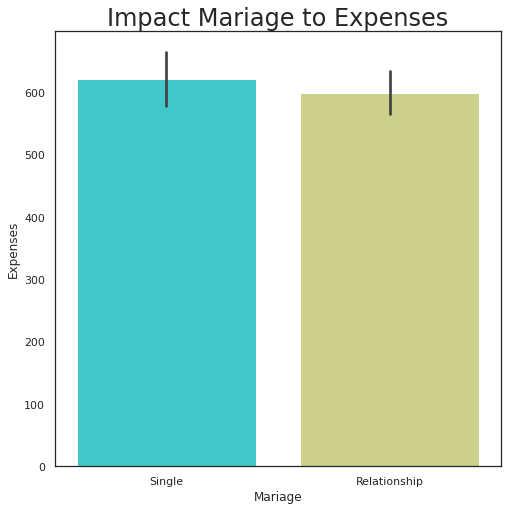

In [ ]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("Impact Mariage to Expenses",fontsize=24)
ax = sns.barplot(x="Mariage", y="Expenses", data=df,palette="rainbow")

Hubungan seseorang terhadap pembelian barang

## Expenses to Education

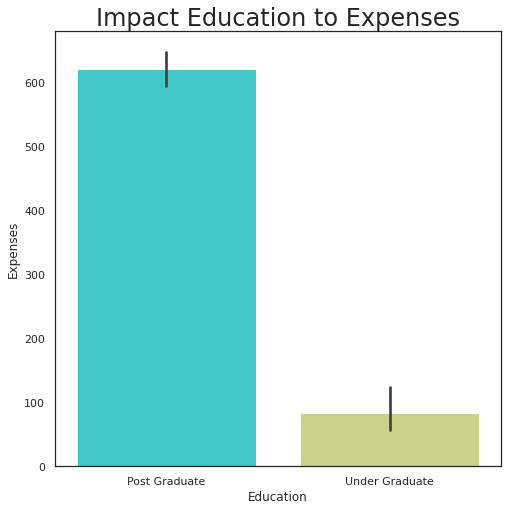

In [ ]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("Impact Education to Expenses",fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=df,palette="rainbow")

Impact pendidikan terhadap pembelian barang

## TotalPurchases to Education

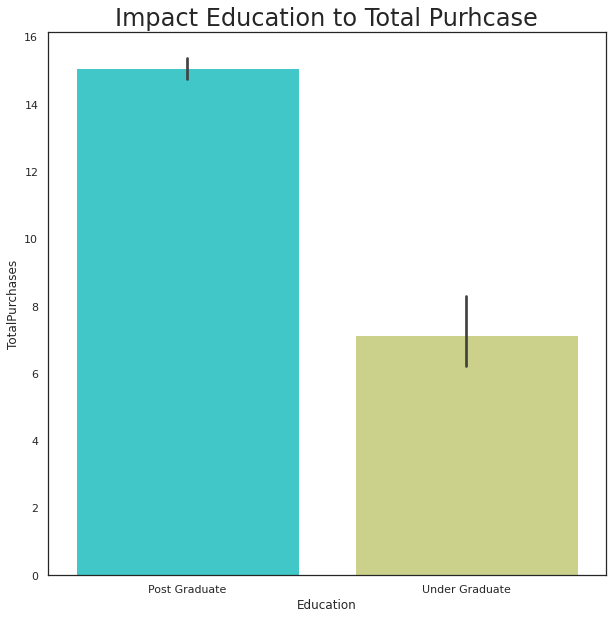

In [ ]:
sns.set_theme(style="white")
plt.figure(figsize=(10,10))
plt.title("Impact Education to Total Purhcase",fontsize=24)
ax = sns.barplot(x="Education", y="TotalPurchases", data=df,palette="rainbow")

Impact pendidikan pada total beli dari website, promosi, calatalog,
toko, dan pengunjung web bulanan

## Total Purchases to Age

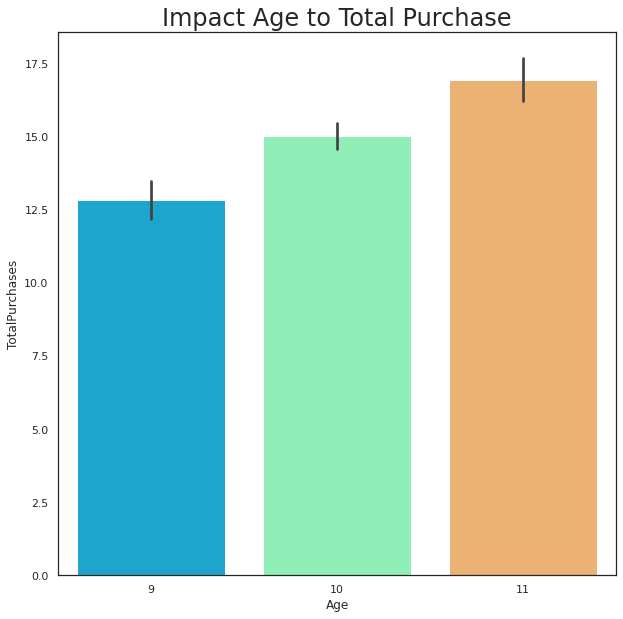

In [ ]:
sns.set_theme(style="white")
plt.figure(figsize=(10,10))
plt.title("Impact Age to Total Purchase",fontsize=24)
ax = sns.barplot(x="Age", y="TotalPurchases", data=df,palette="rainbow")

Impact pelanggan tetap pada total beli dari website, promosi, calatalog, toko, dan pengunjung web bulanan

## Day Enganged To Expenses

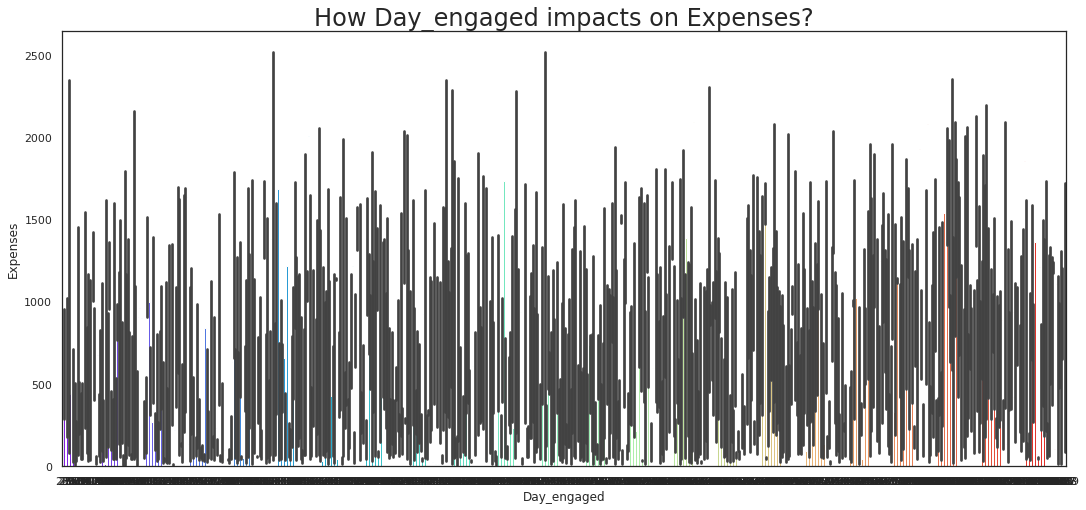

In [ ]:
sns.set_theme(style="white")
plt.figure(figsize=(18,8))
plt.title("How Day_engaged impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Day_engaged", y="Expenses", data=df,palette="rainbow")

## Heatmap

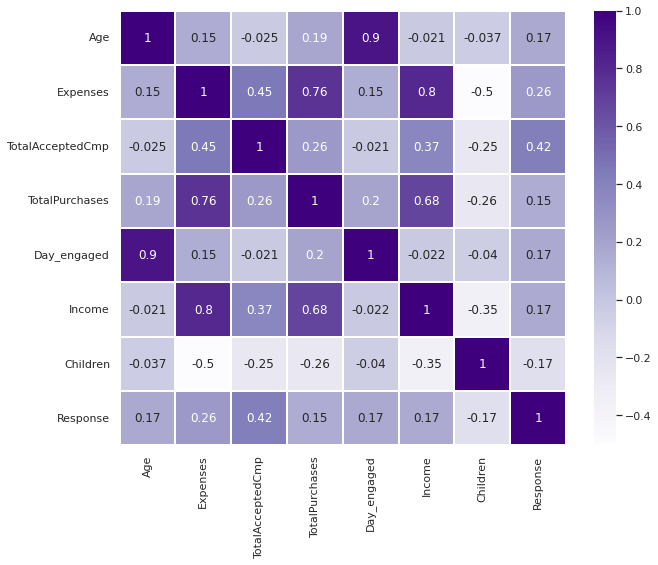

In [ ]:
# melihat korelasi menggunakan heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap = 'Purples',linewidths=1)

# Prepare Modelling

In [ ]:
df.dtypes

Education            object
Mariage              object
Age                   int64
Expenses            float64
TotalAcceptedCmp      int64
TotalPurchases      float64
Day_engaged           int64
Income              float64
Children              int64
Response              int64
dtype: object

In [ ]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(" Object are:",cate)

 Object are: ['Education', 'Mariage']


In [ ]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [ ]:
df_encode = df.copy()

## Standardization

In [ ]:
scaled_features = StandardScaler().fit_transform(df_encode.values)
sf_df = pd.DataFrame(scaled_features, index=df_encode.index, columns=df_encode.columns)

In [ ]:
sf_df.head().style.background_gradient(cmap="Purples")

,Education,Mariage,Age,Expenses,TotalAcceptedCmp,TotalPurchases,Day_engaged,Income,Children,Response
0,-0.157274,1.337334,1.506249,1.672775,-0.442839,1.323308,1.978247,0.294273,-1.277200,2.355501
1,-0.157274,1.337334,-1.409999,-0.961200,-0.442839,-1.160752,-1.659762,-0.265121,1.405383,-0.424538
2,-0.157274,-0.747757,0.048125,0.279584,-0.442839,0.800348,-0.167576,0.933397,-1.277200,-0.424538
3,-0.157274,-0.747757,-1.409999,-0.918129,-0.442839,-0.899272,-1.917777,-1.199405,0.064091,-0.424538
4,-0.157274,-0.747757,-1.409999,-0.306848,-0.442839,0.538868,-0.816913,0.301624,0.064091,-0.424538


In [ ]:
sf_df.describe().style.background_gradient(cmap="Purples")

,Education,Mariage,Age,Expenses,TotalAcceptedCmp,TotalPurchases,Day_engaged,Income,Children,Response
count,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000
mean,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000
std,1.000246,1.000246,1.000246,1.000246,1.000246,1.000246,1.000246,1.000246,1.000246,1.000246
min,-0.157274,-0.747757,-1.409999,-0.997645,-0.442839,-1.945192,-2.197293,-2.381180,-1.277200,-0.424538
25%,-0.157274,-0.747757,-1.409999,-0.891624,-0.442839,-0.899272,-0.748110,-0.781282,-1.277200,-0.424538
50%,-0.157274,-0.747757,0.048125,-0.349919,-0.442839,0.015908,0.000133,-0.019005,0.064091,-0.424538
75%,-0.157274,1.337334,0.048125,0.729762,-0.442839,0.800348,0.744076,0.784833,0.064091,-0.424538
max,6.358347,1.337334,1.506249,3.161841,5.452001,3.349778,2.373870,3.134007,2.746675,2.355501


## Split Data

In [ ]:
X = sf_df.drop('Response', axis=1)
y = sf_df['Response']

for col in X.columns:
    if col != 'TotalAcceptedCmp':
        X[col] = X[col].map(lambda x: int(x))

exp1 = X.copy()
y = y.map(lambda x: int(x))

In [ ]:
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2, random_state=1234)

In [ ]:
print(X_train.shape, X_test.shape)

(1624, 9) (406, 9)


In [ ]:
print(y_train.value_counts())

0    1363
2     261
Name: Response, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 1)
X_smote, y_smote = smote.fit_resample(X_train,y_train)

# Modelling

## Decision Tree

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy',random_state=1234)
tree.fit(X_train, y_train)
y_pred_dct = tree.predict(X_test)

print('Decision Tree Accuracy : ', accuracy_score(y_test,y_pred_dct))
print(confusion_matrix(y_test,y_pred_dct))
print('precision', precision_score(y_test,y_pred_dct,average="weighted", pos_label="int"))
print('recall', recall_score(y_test,y_pred_dct,average="weighted", pos_label="int"))
print('f1_score', f1_score(y_test,y_pred_dct,average="weighted", pos_label="int"))

Decision Tree Accuracy :  0.874384236453202
[[340  17]
 [ 34  15]]
precision 0.8559463166144201
recall 0.874384236453202
f1_score 0.8626629837536012


In [ ]:
tree1 = DecisionTreeClassifier(criterion='entropy',random_state=1234)
tree1.fit(X_smote, y_smote)
y_pred_dct1 = tree1.predict(X_test)

print('Decision Tree Accuracy: ', accuracy_score(y_test,y_pred_dct1))
print(confusion_matrix(y_test,y_pred_dct1))
print('precision', precision_score(y_test,y_pred_dct1,average="weighted", pos_label="label"))
print('recall', recall_score(y_test,y_pred_dct1,average="weighted", pos_label="label"))
print('f1_score', f1_score(y_test,y_pred_dct1,average="weighted", pos_label="label"))

Decision Tree Accuracy:  0.7167487684729064
[[267  90]
 [ 25  24]]
precision 0.8294352733510678
recall 0.7167487684729064
f1_score 0.7590408573115203


## Xgboost

In [ ]:
xgb = XGBClassifier(random_state=1234)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print('Decision Tree Accuracy: ', accuracy_score(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))
print('precision', precision_score(y_test,y_pred_xgb,average="weighted", pos_label="int"))
print('recall', recall_score(y_test,y_pred_xgb,average="weighted", pos_label="int"))
print('f1_score', f1_score(y_test,y_pred_xgb,average="weighted", pos_label="int"))

Decision Tree Accuracy:  0.9014778325123153
[[346  11]
 [ 29  20]]
precision 0.889174638487208
recall 0.9014778325123153
f1_score 0.8916054267947994


In [ ]:
xgb1 = XGBClassifier(random_state=1234)
xgb1.fit(X_smote, y_smote)
y_pred_xgb1 = xgb1.predict(X_test)

print('Decision Tree Accuracy: ', accuracy_score(y_test,y_pred_xgb1))
print(confusion_matrix(y_test,y_pred_xgb1))
print('precision', precision_score(y_test,y_pred_xgb1,average="weighted", pos_label="int"))
print('recall', recall_score(y_test,y_pred_xgb1,average="weighted", pos_label="int"))
print('f1_score', f1_score(y_test,y_pred_xgb1,average="weighted", pos_label="int"))

Decision Tree Accuracy:  0.7832512315270936
[[285  72]
 [ 16  33]]
precision 0.8705006300836292
recall 0.7832512315270936
f1_score 0.8134367466722567
